### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

### Read in Data

In [2]:
#Function to read in the data
def readHF(filename):
        
    with h5py.File(filename, "r") as f:
        
        #data = np.zeros(len(f.keys()))
        dataX = []
        #dataY = []
        
        # List all groups
#         print("Keys: %s" % f.keys())
        
        for i in range(len(f.keys())):

            a_group_key = list(f.keys())[i]
            # Get the data
            temp = list(f[a_group_key])
            
#             print(temp) #test
#             print(np.shape(temp))
            
            dataX.append(temp)
            
    return dataX

In [3]:
S1 = readHF("S1.h5")

In [4]:
np.shape(S1)

(200, 64, 256)

In [5]:
S2match = readHF("S2_match.h5")

In [6]:
np.shape(S2match)

(200, 64, 256)

In [7]:
S2nonmatch = readHF("S2_nonmatch.h5")

In [8]:
np.shape(S2nonmatch)

(200, 64, 256)

In [9]:
patient_info_S1 = pd.read_csv('S1_patient_summary.csv')

In [10]:
patient_info_S1

,Patient,Type,Trial
0,co2c0000337,c,0
1,co2c0000337,c,2
2,co2c0000337,c,16
3,co2c0000337,c,24
4,co2c0000337,c,26
...,...,...,...
195,co2a0000378,a,10
196,co2a0000378,a,12
197,co2a0000378,a,14
198,co2a0000378,a,16


In [11]:
S1LabelTemp = patient_info_S1.iloc[:,1].to_numpy()

In [12]:
S1LabelTemp

array(['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a

In [13]:
np.shape(S1LabelTemp)

(200,)

In [14]:
S1Label = np.zeros(len(S1LabelTemp)) #Control is 0, alcoholic is 1
for i in np.where(S1LabelTemp == 'a'):
    S1Label[i] = 1

In [15]:
print(S1Label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
patient_info_S2match = pd.read_csv('S2_match_patient_summary.csv')

In [17]:
patient_info_S2match

,Patient,Type,Trial
0,co2c0000337,c,17
1,co2c0000337,c,23
2,co2c0000337,c,25
3,co2c0000337,c,27
4,co2c0000337,c,41
...,...,...,...
195,co2a0000378,a,27
196,co2a0000378,a,37
197,co2a0000378,a,41
198,co2a0000378,a,47


In [18]:
S2matchLabelTemp = patient_info_S2match.iloc[:,1].to_numpy()

In [19]:
S2matchLabel = np.zeros(len(S2matchLabelTemp)) #Control is 0, alcoholic is 1
for i in np.where(S2matchLabelTemp == 'a'):
    S2matchLabel[i] = 1

In [20]:
print(S2matchLabel)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
patient_info_S2nonmatch = pd.read_csv('S2_nonmatch_patient_summary.csv')

In [22]:
patient_info_S2nonmatch

,Patient,Type,Trial
0,co2c0000337,c,21
1,co2c0000337,c,29
2,co2c0000337,c,33
3,co2c0000337,c,43
4,co2c0000337,c,53
...,...,...,...
195,co2a0000378,a,21
196,co2a0000378,a,29
197,co2a0000378,a,31
198,co2a0000378,a,33


In [23]:
S2nonmatchLabelTemp = patient_info_S2nonmatch.iloc[:,1].to_numpy()

In [24]:
S2nonmatchLabel = np.zeros(len(S2nonmatchLabelTemp)) #Control is 0, alcoholic is 1
for i in np.where(S2nonmatchLabelTemp == 'a'):
    S2nonmatchLabel[i] = 1

In [25]:
print(S2nonmatchLabel)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


TEST DATA SET

In [26]:
S2nonmatch_TEST = readHF("S2_nonmatch_TEST.h5")

In [27]:
np.shape(S2nonmatch_TEST)

(200, 64, 256)

In [28]:
patient_info_S2nonmatch_TEST = pd.read_csv('S2_nonmatch_patient_summary_TEST.csv')

In [29]:
patient_info_S2nonmatch_TEST

,Patient,Type,Trial
0,co2c0000337,c,67
1,co2c0000337,c,73
2,co2c0000337,c,83
3,co2c0000337,c,87
4,co2c0000337,c,89
...,...,...,...
195,co2a0000378,a,57
196,co2a0000378,a,59
197,co2a0000378,a,63
198,co2a0000378,a,67


In [30]:
S2nonmatchLabelTemp_TEST = patient_info_S2nonmatch_TEST.iloc[:,1].to_numpy()

In [31]:
S2nonmatchLabel_TEST = np.zeros(len(S2nonmatchLabelTemp_TEST)) #Control is 0, alcoholic is 1
for i in np.where(S2nonmatchLabelTemp_TEST == 'a'):
    S2nonmatchLabel_TEST[i] = 1

In [32]:
print(S2nonmatchLabel_TEST)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


FULL DATA SET

In [33]:
S2nonmatch_FULL = readHF("S2_nonmatch_FULL.h5")

In [34]:
np.shape(S2nonmatch_FULL)

(2763, 64, 256)

In [35]:
patient_info_S2nonmatch_FULL = pd.read_csv('S2_nonmatch_patient_summary_FULL.csv')

In [36]:
patient_info_S2nonmatch_FULL

,Patient,Type,Trial
0,co2c0000337,c,21
1,co2c0000337,c,29
2,co2c0000337,c,33
3,co2c0000337,c,43
4,co2c0000337,c,53
...,...,...,...
2758,co2c1000367,c,93
2759,co2c1000367,c,95
2760,co2c1000367,c,103
2761,co2c1000367,c,111


In [37]:
S2nonmatchLabelTemp_FULL = patient_info_S2nonmatch_FULL.iloc[:,1].to_numpy()

In [38]:
S2nonmatchLabel_FULL = np.zeros(len(S2nonmatchLabelTemp_FULL)) #Control is 0, alcoholic is 1
for i in np.where(S2nonmatchLabelTemp_FULL == 'a'):
    S2nonmatchLabel_FULL[i] = 1

In [39]:
print(S2nonmatchLabel_FULL)

[0. 0. 0. ... 0. 0. 0.]


###  Analyze Data

In [40]:
import tensorflow
import keras

In [41]:
from tensorflow.keras.utils import to_categorical

Reshape to be able to put into CNN

S1:

In [42]:
np.shape(S1)

(200, 64, 256)

In [43]:
S1NP = np.array(S1)
np.shape(S1NP)

(200, 64, 256)

In [44]:
S1Reshape = S1NP.reshape(-1, 64,256, 1)
np.shape(S1Reshape)

(200, 64, 256, 1)

S2match:

In [45]:
np.shape(S2match)

(200, 64, 256)

In [46]:
S2matchNP = np.array(S2match)
np.shape(S2matchNP)

(200, 64, 256)

In [47]:
S2matchReshape = S2matchNP.reshape(-1, 64,256, 1)
np.shape(S2matchReshape)

(200, 64, 256, 1)

S2nonmatch:

In [48]:
np.shape(S2nonmatch)

(200, 64, 256)

In [49]:
S2nonmatchNP = np.array(S2nonmatch)
np.shape(S2nonmatchNP)

(200, 64, 256)

In [50]:
S2nonmatchReshape = S2nonmatchNP.reshape(-1, 64,256, 1)
np.shape(S2nonmatchReshape)

(200, 64, 256, 1)

In [51]:
type(S2nonmatchReshape[0,0,0,0])

numpy.float64

One Hot Encoding

(got rid of this)

S1:

In [52]:
S1Label_one_hot = to_categorical(S1Label)

In [53]:
np.shape(S1Label_one_hot)

(200, 2)

S2match:

In [54]:
S2matchLabel_one_hot = to_categorical(S2matchLabel)

In [55]:
np.shape(S2matchLabel_one_hot)

(200, 2)

S2nonmatch:

In [56]:
S2nonmatchLabel_one_hot = to_categorical(S2nonmatchLabel)

In [57]:
np.shape(S2nonmatchLabel_one_hot)

(200, 2)

Normalize 0-1

S1:

In [58]:
print(np.max(S1Reshape),np.min(S1Reshape))

453.847 -153.29


In [59]:
S1Norm = S1Reshape / np.max(S1Reshape)

S2match:

In [60]:
print(np.max(S2matchReshape),np.min(S2matchReshape))

290.283 -159.526


In [61]:
S2matchNorm = S2matchReshape / np.max(S2matchReshape)

S2nonmatch:

In [62]:
print(np.max(S2nonmatchReshape),np.min(S2nonmatchReshape))

346.12 -161.296


In [63]:
S2nonmatchNorm = S2nonmatchReshape / np.max(S2nonmatchReshape)

TEST SET for S2 nonmatch

In [64]:
np.shape(S2nonmatch_TEST)

(200, 64, 256)

In [65]:
S2nonmatchNP_TEST = np.array(S2nonmatch_TEST)
np.shape(S2nonmatchNP_TEST)

(200, 64, 256)

In [66]:
S2nonmatchReshape_TEST = S2nonmatchNP_TEST.reshape(-1, 64,256, 1)
np.shape(S2nonmatchReshape_TEST)

(200, 64, 256, 1)

In [67]:
print(np.max(S2nonmatchReshape_TEST),np.min(S2nonmatchReshape_TEST))

217.519 -143.656


In [68]:
S2nonmatchNorm_TEST = S2nonmatchReshape_TEST / np.max(S2nonmatchReshape_TEST)

In [69]:
S2nonmatchLabel_one_hot_TEST = to_categorical(S2nonmatchLabel_TEST)

In [70]:
np.shape(S2nonmatchLabel_one_hot_TEST)

(200, 2)

In [71]:
S2nonmatchLabel_TEST

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
S2nonmatchLabel_one_hot_TEST

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

FULL Data Set

In [73]:
np.shape(S2nonmatch_FULL)

(2763, 64, 256)

In [74]:
S2nonmatchNP_FULL = np.array(S2nonmatch_FULL)
np.shape(S2nonmatchNP_FULL)

(2763, 64, 256)

In [75]:
S2nonmatchReshape_FULL = S2nonmatchNP_FULL.reshape(-1, 64,256, 1)
np.shape(S2nonmatchReshape_FULL)

(2763, 64, 256, 1)

In [76]:
print(np.max(S2nonmatchReshape_FULL),np.min(S2nonmatchReshape_FULL))

680.125 -700.114


In [77]:
S2nonmatchNorm_FULL = S2nonmatchReshape_FULL / np.abs(np.min(S2nonmatchReshape_FULL))

In [78]:
S2nonmatchLabel_FULL

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
S2nonmatchLabel_one_hot_FULL = to_categorical(S2nonmatchLabel_FULL)

In [80]:
np.shape(S2nonmatchLabel_one_hot_FULL)

(2763, 2)

In [81]:
S2nonmatchLabel_FULL

array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
S2nonmatchLabel_one_hot_FULL

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Split into Training and Testing

In [83]:
import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection

S1:

In [84]:
x_train_all_S1, x_validate_S1, y_train_all_S1, y_validate_S1 = model_selection.train_test_split(S1Norm, S1Label_one_hot, test_size=0.1,random_state = 40)

x_train_S1, x_test_S1, y_train_S1, y_test_S1 = model_selection.train_test_split(x_train_all_S1, y_train_all_S1, test_size=0.2, random_state = 40)

In [85]:
np.shape(x_train_S1), np.shape(y_train_S1)

((144, 64, 256, 1), (144, 2))

S2match:

In [86]:
x_train_all_S2match, x_validate_S2match, y_train_all_S2match, y_validate_S2match = model_selection.train_test_split(S2matchNorm, S2matchLabel_one_hot, test_size=0.1,random_state = 40)

x_train_S2match, x_test_S2match, y_train_S2match, y_test_S2match = model_selection.train_test_split(x_train_all_S2match, y_train_all_S2match, test_size=0.2, random_state = 40)

In [87]:
np.shape(x_train_S2match), np.shape(y_train_S2match)

((144, 64, 256, 1), (144, 2))

S2nonmatch:

In [88]:
x_train_all_S2nonmatch, x_validate_S2nonmatch, y_train_all_S2nonmatch, y_validate_S2nonmatch = model_selection.train_test_split(S2nonmatchNorm, S2nonmatchLabel_one_hot, test_size=0.1,random_state = 40)

x_train_S2nonmatch, x_test_S2nonmatch, y_train_S2nonmatch, y_test_S2nonmatch = model_selection.train_test_split(x_train_all_S2nonmatch, y_train_all_S2nonmatch, test_size=0.2, random_state = 40)

In [89]:
np.shape(x_train_S2nonmatch), np.shape(y_train_S2nonmatch)

((144, 64, 256, 1), (144, 2))

FULL Data Set

In [90]:
x_train_all_S2nonmatch_FULL, x_validate_S2nonmatch_FULL, y_train_all_S2nonmatch_FULL, y_validate_S2nonmatch_FULL = model_selection.train_test_split(S2nonmatchNorm_FULL, S2nonmatchLabel_one_hot_FULL, test_size=0.1,random_state = 40)

x_train_S2nonmatch_FULL, x_test_S2nonmatch_FULL, y_train_S2nonmatch_FULL, y_test_S2nonmatch_FULL = model_selection.train_test_split(x_train_all_S2nonmatch_FULL, y_train_all_S2nonmatch_FULL, test_size=0.2, random_state = 40)

In [91]:
np.shape(x_train_S2nonmatch_FULL), np.shape(y_train_S2nonmatch_FULL)

((1988, 64, 256, 1), (1988, 2))

### CNN

In [92]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [93]:
batch_size = 64
epochs = 20
num_classes = 2

In [94]:
CNN = Sequential()
CNN.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,256,1),padding='same'))
CNN.add(LeakyReLU(alpha=0.1))
CNN.add(MaxPooling2D((2, 2),padding='same'))

CNN.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
CNN.add(LeakyReLU(alpha=0.1))
CNN.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

CNN.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
CNN.add(LeakyReLU(alpha=0.1))                  
CNN.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

CNN.add(Flatten())
CNN.add(Dense(128, activation='linear'))
CNN.add(LeakyReLU(alpha=0.1))

CNN.add(Dense(num_classes, activation='softmax'))

In [95]:
# CNN = Sequential()
# CNN.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,256,1),padding='same'))
# CNN.add(LeakyReLU(alpha=0.1))
# CNN.add(MaxPooling2D((2, 2),padding='same'))
# CNN.add(Dropout(0.25)) #Dropout

# CNN.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# CNN.add(LeakyReLU(alpha=0.1))
# CNN.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# CNN.add(Dropout(0.25)) #Dropout

# CNN.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# CNN.add(LeakyReLU(alpha=0.1))                  
# CNN.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# CNN.add(Dropout(0.4)) #Dropout

# CNN.add(Flatten())
# CNN.add(Dense(128, activation='linear'))
# CNN.add(LeakyReLU(alpha=0.1))
# CNN.add(Dropout(0.3)) #Dropout

# CNN.add(Dense(num_classes, activation='softmax'))

In [96]:
CNN.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [97]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 256, 32)       320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 256, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 128, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 128, 64)       18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 128, 64)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 64, 64)       0         
 2D)                                                    

### Training

S1:

In [84]:
%%time
CNN_train_S1 = CNN.fit(x_train_S1, y_train_S1, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test_S1, y_test_S1))

Epoch 1/20
3/3 [==============================] - 2s 611ms/step - loss: 0.6967 - accuracy: 0.5486 - val_loss: 0.6792 - val_accuracy: 0.7222
Epoch 2/20
3/3 [==============================] - 2s 508ms/step - loss: 0.6810 - accuracy: 0.5278 - val_loss: 0.6601 - val_accuracy: 0.6944
Epoch 3/20
3/3 [==============================] - 2s 531ms/step - loss: 0.6250 - accuracy: 0.7431 - val_loss: 0.6772 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 2s 549ms/step - loss: 0.5806 - accuracy: 0.7153 - val_loss: 0.9467 - val_accuracy: 0.4722
Epoch 5/20
3/3 [==============================] - 2s 614ms/step - loss: 0.5546 - accuracy: 0.6944 - val_loss: 0.5479 - val_accuracy: 0.6944
Epoch 6/20
3/3 [==============================] - 2s 564ms/step - loss: 0.5399 - accuracy: 0.6667 - val_loss: 0.6332 - val_accuracy: 0.5278
Epoch 7/20
3/3 [==============================] - 2s 597ms/step - loss: 0.4889 - accuracy: 0.8264 - val_loss: 0.6170 - val_accuracy: 0.6389
Epoch 8/20
3/3 [====

In [85]:
test_eval_S1 = CNN.evaluate(x_test_S1, y_test_S1, verbose=0)

In [86]:
test_eval_S1

[0.8862846493721008, 0.6388888955116272]

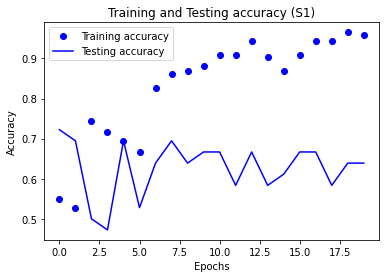

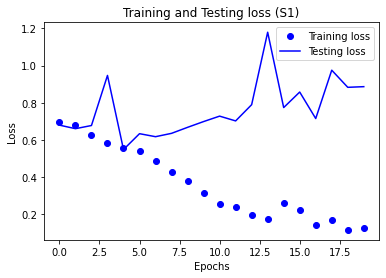

In [87]:
accuracy = CNN_train_S1.history['accuracy']
test_accuracy = CNN_train_S1.history['val_accuracy']
loss = CNN_train_S1.history['loss']
test_loss = CNN_train_S1.history['val_loss']
epochsRange = range(len(accuracy))
plt.plot(epochsRange, accuracy, 'bo', label='Training accuracy')
plt.plot(epochsRange, test_accuracy, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy (S1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Baseline_CNN_s1_accuracy', bbox_inches='tight')
plt.figure()
plt.plot(epochsRange, loss, 'bo', label='Training loss')
plt.plot(epochsRange, test_loss, 'b', label='Testing loss')
plt.title('Training and Testing loss (S1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Baseline_CNN_s1_loss', bbox_inches='tight')
plt.show()

S2match:

In [88]:
%%time
CNN_train_S2match = CNN.fit(x_train_S2match, y_train_S2match, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test_S2match, y_test_S2match))

Epoch 1/20
3/3 [==============================] - 2s 701ms/step - loss: 0.9898 - accuracy: 0.6528 - val_loss: 0.8734 - val_accuracy: 0.6389
Epoch 2/20
3/3 [==============================] - 2s 630ms/step - loss: 0.6734 - accuracy: 0.7014 - val_loss: 0.7337 - val_accuracy: 0.7222
Epoch 3/20
3/3 [==============================] - 2s 683ms/step - loss: 0.4647 - accuracy: 0.7708 - val_loss: 0.6284 - val_accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 2s 683ms/step - loss: 0.4125 - accuracy: 0.8611 - val_loss: 0.6334 - val_accuracy: 0.7222
Epoch 5/20
3/3 [==============================] - 2s 650ms/step - loss: 0.3458 - accuracy: 0.8681 - val_loss: 0.6825 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 2s 621ms/step - loss: 0.3517 - accuracy: 0.8264 - val_loss: 0.7301 - val_accuracy: 0.6944
Epoch 7/20
3/3 [==============================] - 2s 650ms/step - loss: 0.3113 - accuracy: 0.8681 - val_loss: 0.7591 - val_accuracy: 0.6944
Epoch 8/20
3/3 [====

In [89]:
test_eval_S2match = CNN.evaluate(x_test_S2match, y_test_S2match, verbose=0)

In [90]:
test_eval_S2match

[0.7739989757537842, 0.75]

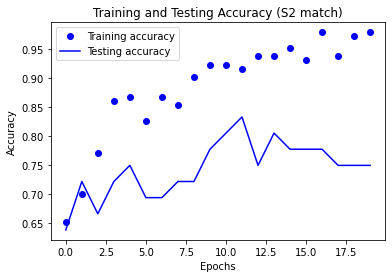

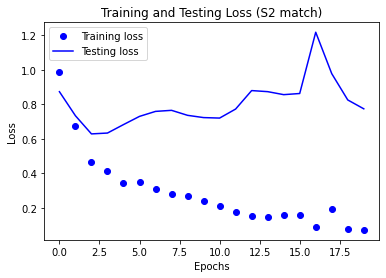

In [91]:
accuracy_S2match = CNN_train_S2match.history['accuracy']
test_accuracy_S2match = CNN_train_S2match.history['val_accuracy']
loss_S2match = CNN_train_S2match.history['loss']
test_loss_S2match = CNN_train_S2match.history['val_loss']
epochsRange = range(len(accuracy_S2match))
plt.plot(epochsRange, accuracy_S2match, 'bo', label='Training accuracy')
plt.plot(epochsRange, test_accuracy_S2match, 'b', label='Testing accuracy')
plt.title('Training and Testing Accuracy (S2 match)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Baseline_CNN_s2match_accuracy', bbox_inches='tight')
plt.figure()
plt.plot(epochsRange, loss_S2match, 'bo', label='Training loss')
plt.plot(epochsRange, test_loss_S2match, 'b', label='Testing loss')
plt.title('Training and Testing Loss (S2 match)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Baseline_CNN_s2match_loss', bbox_inches='tight')
plt.show()

S2nonmatch:

In [92]:
%%time
CNN_train_S2nonmatch = CNN.fit(x_train_S2nonmatch, y_train_S2nonmatch, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test_S2nonmatch, y_test_S2nonmatch))

Epoch 1/20
3/3 [==============================] - 2s 585ms/step - loss: 0.5338 - accuracy: 0.7500 - val_loss: 0.6341 - val_accuracy: 0.7500
Epoch 2/20
3/3 [==============================] - 2s 575ms/step - loss: 0.4601 - accuracy: 0.8403 - val_loss: 0.5801 - val_accuracy: 0.8056
Epoch 3/20
3/3 [==============================] - 2s 579ms/step - loss: 0.4168 - accuracy: 0.8403 - val_loss: 0.8445 - val_accuracy: 0.7222
Epoch 4/20
3/3 [==============================] - 2s 633ms/step - loss: 0.3293 - accuracy: 0.8403 - val_loss: 0.6274 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 2s 651ms/step - loss: 0.2219 - accuracy: 0.9097 - val_loss: 0.6203 - val_accuracy: 0.7222
Epoch 6/20
3/3 [==============================] - 2s 592ms/step - loss: 0.1867 - accuracy: 0.9444 - val_loss: 0.9408 - val_accuracy: 0.6944
Epoch 7/20
3/3 [==============================] - 2s 689ms/step - loss: 0.2030 - accuracy: 0.9028 - val_loss: 0.7548 - val_accuracy: 0.7222
Epoch 8/20
3/3 [====

In [93]:
test_eval_S2nonmatch = CNN.evaluate(x_test_S2nonmatch, y_test_S2nonmatch, verbose=0)

In [94]:
test_eval_S2nonmatch

[0.9961051940917969, 0.7777777910232544]

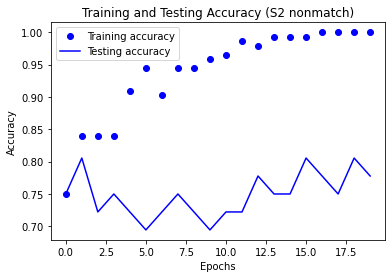

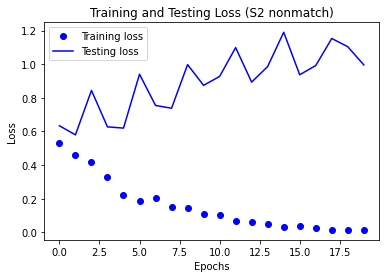

In [95]:
accuracy_S2nonmatch = CNN_train_S2nonmatch.history['accuracy']
test_accuracy_S2nonmatch = CNN_train_S2nonmatch.history['val_accuracy']
loss_S2nonmatch = CNN_train_S2nonmatch.history['loss']
test_loss_S2nonmatch = CNN_train_S2nonmatch.history['val_loss']
epochsRange = range(len(accuracy_S2nonmatch))
plt.plot(epochsRange, accuracy_S2nonmatch, 'bo', label='Training accuracy')
plt.plot(epochsRange, test_accuracy_S2nonmatch, 'b', label='Testing accuracy')
plt.title('Training and Testing Accuracy (S2 nonmatch)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Baseline_CNN_s2nonmatch_accuracy', bbox_inches='tight')
plt.figure()
plt.plot(epochsRange, loss_S2nonmatch, 'bo', label='Training loss')
plt.plot(epochsRange, test_loss_S2nonmatch, 'b', label='Testing loss')
plt.title('Training and Testing Loss (S2 nonmatch)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Baseline_CNN_s2nonmatch_loss', bbox_inches='tight')
plt.show()

S2nonmatch WITH FULL TRAIN AND TEST SETS

In [96]:
%%time
CNN_train_S2nonmatch = CNN.fit(S2nonmatchNorm, S2nonmatchLabel_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(S2nonmatchNorm_TEST, S2nonmatchLabel_one_hot_TEST))

Epoch 1/20
4/4 [==============================] - 3s 822ms/step - loss: 0.8668 - accuracy: 0.5000 - val_loss: 0.6761 - val_accuracy: 0.5700
Epoch 2/20
4/4 [==============================] - 3s 757ms/step - loss: 0.6780 - accuracy: 0.6550 - val_loss: 0.6603 - val_accuracy: 0.5950
Epoch 3/20
4/4 [==============================] - 3s 772ms/step - loss: 0.6733 - accuracy: 0.5900 - val_loss: 0.6423 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 3s 831ms/step - loss: 0.6360 - accuracy: 0.6750 - val_loss: 0.5979 - val_accuracy: 0.7350
Epoch 5/20
4/4 [==============================] - 3s 839ms/step - loss: 0.5955 - accuracy: 0.6650 - val_loss: 0.6450 - val_accuracy: 0.5950
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 0.5512 - accuracy: 0.7200 - val_loss: 0.7464 - val_accuracy: 0.5950
Epoch 7/20
4/4 [==============================] - 4s 902ms/step - loss: 0.5363 - accuracy: 0.7550 - val_loss: 0.8120 - val_accuracy: 0.6100
Epoch 8/20
4/4 [=======

In [97]:
test_eval_S2nonmatch = CNN.evaluate(S2nonmatchNorm_TEST, S2nonmatchLabel_one_hot_TEST, verbose=0)

In [98]:
test_eval_S2nonmatch

[1.1222459077835083, 0.7149999737739563]

In [99]:
y_pred_S2nonmatch_one_hot = CNN.predict(S2nonmatchNorm_TEST)

In [100]:
S2nonmatchLabel_one_hot_TEST

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [101]:
y_pred_S2nonmatch_one_hot

array([[1.00000000e+00, 3.11705399e-08],
       [4.84536499e-01, 5.15463471e-01],
       [5.50142705e-01, 4.49857354e-01],
       [9.99999285e-01, 7.49431308e-07],
       [1.77885201e-02, 9.82211530e-01],
       [5.27876973e-01, 4.72122967e-01],
       [9.68338609e-01, 3.16613764e-02],
       [9.96710062e-01, 3.28987720e-03],
       [1.07764062e-02, 9.89223599e-01],
       [9.99996185e-01, 3.84492068e-06],
       [4.84654129e-01, 5.15345931e-01],
       [3.64365661e-07, 9.99999642e-01],
       [1.65224704e-03, 9.98347759e-01],
       [9.71553326e-01, 2.84467340e-02],
       [1.41568452e-01, 8.58431578e-01],
       [4.92451847e-01, 5.07548094e-01],
       [2.99897611e-01, 7.00102389e-01],
       [5.63597423e-05, 9.99943614e-01],
       [9.99052107e-01, 9.47906228e-04],
       [4.11349116e-03, 9.95886505e-01],
       [1.81072652e-02, 9.81892705e-01],
       [8.12736392e-01, 1.87263668e-01],
       [1.42245039e-01, 8.57754886e-01],
       [4.46810620e-03, 9.95531917e-01],
       [6.277154

In [102]:
y_pred_S2nonmatch = y_pred_S2nonmatch_one_hot[:,1]

In [103]:
y_pred_S2nonmatch

array([3.11705399e-08, 5.15463471e-01, 4.49857354e-01, 7.49431308e-07,
       9.82211530e-01, 4.72122967e-01, 3.16613764e-02, 3.28987720e-03,
       9.89223599e-01, 3.84492068e-06, 5.15345931e-01, 9.99999642e-01,
       9.98347759e-01, 2.84467340e-02, 8.58431578e-01, 5.07548094e-01,
       7.00102389e-01, 9.99943614e-01, 9.47906228e-04, 9.95886505e-01,
       9.81892705e-01, 1.87263668e-01, 8.57754886e-01, 9.95531917e-01,
       3.72284561e-01, 8.84869337e-01, 1.94099080e-03, 1.21964656e-01,
       3.24966168e-05, 5.38714707e-01, 9.73822355e-01, 2.31084778e-06,
       4.04303521e-01, 9.17594850e-01, 9.96833861e-01, 9.85908322e-03,
       1.02155283e-03, 6.38556242e-01, 9.99999881e-01, 9.99635100e-01,
       2.27047756e-01, 3.16670686e-02, 9.21473563e-01, 1.14528358e-01,
       3.26485897e-04, 6.82406962e-01, 6.44680679e-01, 1.29020587e-01,
       9.08746004e-01, 5.14544606e-01, 9.90899124e-21, 3.36742029e-20,
       1.64340573e-19, 1.55931947e-20, 2.26921409e-18, 6.07471546e-21,
      

In [104]:
S2nonmatchLabel_TEST

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [105]:
c_range = np.linspace(0,1,100)

accuracies = np.ones(len(c_range))

for i in range(len(c_range)):
    c = c_range[i]
    # Compute accuracy as before but with threshold c
    accuracies[i] = np.sum(1*(y_pred_S2nonmatch>c)
                           ==S2nonmatchLabel_TEST)/len(S2nonmatchLabel_TEST)

In [106]:
accuracies

array([0.5  , 0.65 , 0.655, 0.66 , 0.67 , 0.67 , 0.67 , 0.67 , 0.67 ,
       0.67 , 0.67 , 0.67 , 0.68 , 0.685, 0.685, 0.685, 0.685, 0.685,
       0.685, 0.69 , 0.69 , 0.69 , 0.69 , 0.695, 0.695, 0.695, 0.695,
       0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.695, 0.7  ,
       0.7  , 0.705, 0.705, 0.705, 0.705, 0.71 , 0.71 , 0.71 , 0.715,
       0.72 , 0.72 , 0.72 , 0.72 , 0.715, 0.715, 0.72 , 0.73 , 0.73 ,
       0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735, 0.735,
       0.735, 0.75 , 0.75 , 0.75 , 0.75 , 0.755, 0.755, 0.76 , 0.76 ,
       0.76 , 0.76 , 0.765, 0.765, 0.765, 0.77 , 0.775, 0.775, 0.775,
       0.775, 0.77 , 0.77 , 0.765, 0.765, 0.765, 0.77 , 0.77 , 0.77 ,
       0.775, 0.775, 0.785, 0.775, 0.77 , 0.775, 0.78 , 0.765, 0.78 ,
       0.5  ])

In [107]:
print(np.max(accuracies),c_range[np.argmax(accuracies)])

0.785 0.9292929292929294


In [108]:
y_pred_S2nonmatch_new = np.zeros(len(y_pred_S2nonmatch))
for i in range(len(y_pred_S2nonmatch)):
    if(y_pred_S2nonmatch[i] > 0.5):
        y_pred_S2nonmatch_new[i] = 1
    else:
        y_pred_S2nonmatch_new[i] = 0

In [109]:
y_pred_S2nonmatch_new

array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [110]:
np.shape(y_pred_S2nonmatch_new)

(200,)

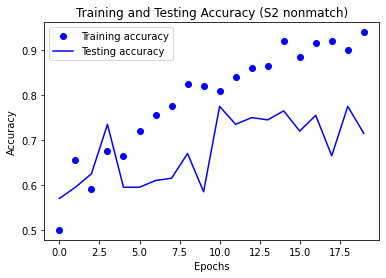

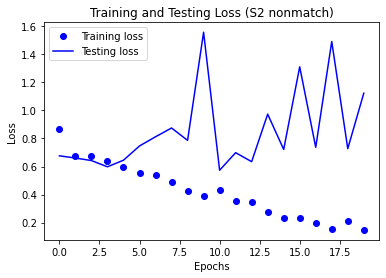

In [111]:
accuracy_S2nonmatch = CNN_train_S2nonmatch.history['accuracy']
test_accuracy_S2nonmatch = CNN_train_S2nonmatch.history['val_accuracy']
loss_S2nonmatch = CNN_train_S2nonmatch.history['loss']
test_loss_S2nonmatch = CNN_train_S2nonmatch.history['val_loss']
epochsRange = range(len(accuracy_S2nonmatch))
plt.plot(epochsRange, accuracy_S2nonmatch, 'bo', label='Training accuracy')
plt.plot(epochsRange, test_accuracy_S2nonmatch, 'b', label='Testing accuracy')
plt.title('Training and Testing Accuracy (S2 nonmatch)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Baseline_CNN_s2nonmatch_accuracy', bbox_inches='tight')
plt.figure()
plt.plot(epochsRange, loss_S2nonmatch, 'bo', label='Training loss')
plt.plot(epochsRange, test_loss_S2nonmatch, 'b', label='Testing loss')
plt.title('Training and Testing Loss (S2 nonmatch)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Baseline_CNN_s2nonmatch_loss', bbox_inches='tight')
plt.show()

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

([<matplotlib.axis.YTick at 0x27c27640970>,
 [Text(0, 0, 'Control'), Text(0, 1, 'Alcoholic')])

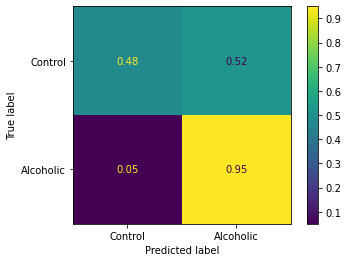

In [113]:
# Obtain the confusion matrix
cm = confusion_matrix(y_true = S2nonmatchLabel_TEST, 
                      y_pred = y_pred_S2nonmatch_new, normalize='true')

# Plot it!
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

#fig_path = model_path+'S1-conf_mat.png'
#plt.savefig(fig_path)

plt.xticks(ticks = [0,1], labels=['Control','Alcoholic'])
plt.yticks(ticks = [0,1], labels=['Control','Alcoholic'])

FULL Data Set

In [98]:
%%time
epochs = 200
CNN_train_S2nonmatch_FULL = CNN.fit(x_train_S2nonmatch_FULL, y_train_S2nonmatch_FULL, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test_S2nonmatch_FULL, y_test_S2nonmatch_FULL))

Epoch 1/200
32/32 [==============================] - 29s 833ms/step - loss: 0.6550 - accuracy: 0.6424 - val_loss: 0.6598 - val_accuracy: 0.6024
Epoch 2/200
32/32 [==============================] - 26s 824ms/step - loss: 0.6213 - accuracy: 0.6524 - val_loss: 0.6424 - val_accuracy: 0.6446
Epoch 3/200
32/32 [==============================] - 26s 822ms/step - loss: 0.5992 - accuracy: 0.6605 - val_loss: 0.6403 - val_accuracy: 0.6325
Epoch 4/200
32/32 [==============================] - 27s 854ms/step - loss: 0.5823 - accuracy: 0.6715 - val_loss: 0.6253 - val_accuracy: 0.6265
Epoch 5/200
32/32 [==============================] - 27s 843ms/step - loss: 0.5773 - accuracy: 0.6751 - val_loss: 0.6480 - val_accuracy: 0.6124
Epoch 6/200
32/32 [==============================] - 27s 829ms/step - loss: 0.5755 - accuracy: 0.6821 - val_loss: 0.6221 - val_accuracy: 0.6406
Epoch 7/200
32/32 [==============================] - 27s 843ms/step - loss: 0.5475 - accuracy: 0.7062 - val_loss: 0.6514 - val_accuracy:

In [99]:
y_pred_S2nonmatch_one_hot_FULL = CNN.predict(x_test_S2nonmatch_FULL)

In [100]:
y_pred_S2nonmatch_one_hot_FULL

array([[1.26147221e-04, 9.99873877e-01],
       [4.15275055e-15, 1.00000000e+00],
       [4.07437817e-08, 1.00000000e+00],
       [4.95865429e-03, 9.95041430e-01],
       [5.15936299e-05, 9.99948382e-01],
       [1.04643598e-01, 8.95356357e-01],
       [3.63937928e-03, 9.96360600e-01],
       [3.29930931e-02, 9.67006922e-01],
       [2.11206481e-01, 7.88793564e-01],
       [3.04950269e-08, 1.00000000e+00],
       [2.24443735e-03, 9.97755587e-01],
       [9.67395695e-12, 1.00000000e+00],
       [3.37091806e-05, 9.99966264e-01],
       [3.18387181e-01, 6.81612849e-01],
       [9.99999881e-01, 6.55122250e-08],
       [8.42452641e-19, 1.00000000e+00],
       [1.22988911e-06, 9.99998808e-01],
       [9.97154236e-01, 2.84570502e-03],
       [6.32874784e-04, 9.99367177e-01],
       [1.85880109e-12, 1.00000000e+00],
       [5.63484393e-02, 9.43651617e-01],
       [9.97398496e-01, 2.60154670e-03],
       [1.00000000e+00, 4.44644807e-11],
       [8.09870381e-03, 9.91901219e-01],
       [9.999990

In [101]:
y_pred_S2nonmatch_FULL = y_pred_S2nonmatch_one_hot_FULL[:,0]

In [102]:
y_pred_S2nonmatch_FULL

array([1.26147221e-04, 4.15275055e-15, 4.07437817e-08, 4.95865429e-03,
       5.15936299e-05, 1.04643598e-01, 3.63937928e-03, 3.29930931e-02,
       2.11206481e-01, 3.04950269e-08, 2.24443735e-03, 9.67395695e-12,
       3.37091806e-05, 3.18387181e-01, 9.99999881e-01, 8.42452641e-19,
       1.22988911e-06, 9.97154236e-01, 6.32874784e-04, 1.85880109e-12,
       5.63484393e-02, 9.97398496e-01, 1.00000000e+00, 8.09870381e-03,
       9.99999046e-01, 4.93135005e-02, 1.63886696e-01, 2.27227681e-10,
       9.99951720e-01, 9.99999642e-01, 1.04426508e-04, 9.97818828e-01,
       9.98771012e-01, 1.38781935e-01, 2.66465850e-06, 1.56812985e-06,
       9.97852921e-01, 5.78993335e-02, 2.64630318e-01, 5.30641992e-05,
       3.66619793e-06, 3.95707575e-05, 8.99091840e-01, 9.92528439e-01,
       3.15423548e-01, 1.39331399e-03, 4.18517172e-01, 7.00469688e-02,
       5.36988373e-05, 2.47014806e-01, 1.79448293e-03, 7.16256618e-04,
       9.98378396e-01, 2.18352798e-04, 4.55238111e-02, 2.15529261e-09,
      

In [103]:
y_test_S2nonmatch_FULL_new = y_test_S2nonmatch_FULL[:,0]

In [104]:
y_test_S2nonmatch_FULL_new

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1.

In [105]:
c_range = np.linspace(0,1,100)

accuracies = np.ones(len(c_range))

for i in range(len(c_range)):
    c = c_range[i]
    # Compute accuracy as before but with threshold c
    accuracies[i] = np.sum(1*(y_pred_S2nonmatch_FULL>c)
                           ==y_test_S2nonmatch_FULL_new)/len(y_test_S2nonmatch_FULL_new)

In [106]:
accuracies

array([0.39759036, 0.65863454, 0.6746988 , 0.67670683, 0.68072289,
       0.68875502, 0.68875502, 0.68875502, 0.69477912, 0.69477912,
       0.70080321, 0.70080321, 0.69879518, 0.70281124, 0.70481928,
       0.70080321, 0.70281124, 0.70080321, 0.70080321, 0.69879518,
       0.69678715, 0.70281124, 0.70883534, 0.71285141, 0.71084337,
       0.71485944, 0.71285141, 0.71485944, 0.71485944, 0.71686747,
       0.7188755 , 0.72088353, 0.72690763, 0.72690763, 0.72289157,
       0.7188755 , 0.72088353, 0.72088353, 0.7188755 , 0.7188755 ,
       0.7188755 , 0.7188755 , 0.72289157, 0.72289157, 0.72690763,
       0.7248996 , 0.7248996 , 0.7248996 , 0.7248996 , 0.72289157,
       0.72289157, 0.72289157, 0.72289157, 0.72289157, 0.7248996 ,
       0.72289157, 0.72289157, 0.72088353, 0.72690763, 0.72690763,
       0.7248996 , 0.7248996 , 0.7248996 , 0.7248996 , 0.72690763,
       0.72690763, 0.72690763, 0.72690763, 0.72690763, 0.7248996 ,
       0.7248996 , 0.7248996 , 0.7248996 , 0.7248996 , 0.72489

In [107]:
print(np.max(accuracies),c_range[np.argmax(accuracies)])

0.7269076305220884 0.32323232323232326


In [108]:
y_pred_S2nonmatch_new_FULL = np.zeros(len(y_pred_S2nonmatch_FULL))
for i in range(len(y_pred_S2nonmatch_FULL)):
    if(y_pred_S2nonmatch_FULL[i] > 0.5):
        y_pred_S2nonmatch_new_FULL[i] = 1
    else:
        y_pred_S2nonmatch_new_FULL[i] = 0

In [109]:
y_pred_S2nonmatch_new_FULL

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1.

In [110]:
np.shape(y_pred_S2nonmatch_new_FULL)

(498,)

([<matplotlib.axis.YTick at 0x2ba46440700>,
 [Text(0, 0, 'Control'), Text(0, 1, 'Alcoholic')])

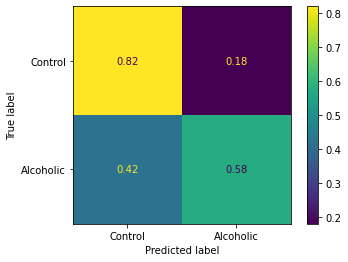

In [113]:
# Obtain the confusion matrix
cm = confusion_matrix(y_true = y_test_S2nonmatch_FULL_new, 
                      y_pred = y_pred_S2nonmatch_new_FULL, normalize='true')

# Plot it!
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

#fig_path = model_path+'S1-conf_mat.png'
#plt.savefig(fig_path)

plt.xticks(ticks = [0,1], labels=['Control','Alcoholic'])
plt.yticks(ticks = [0,1], labels=['Control','Alcoholic'])